# Age Analysis Numeric
@Author Friederike Moroff

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
from matplotlib import pyplot as plt

In [66]:
# Read the data
data = pd.read_csv("../dat/preprocessed_brca_metabric_clinical_data.tsv", sep='\t')

## Age vs Therapy

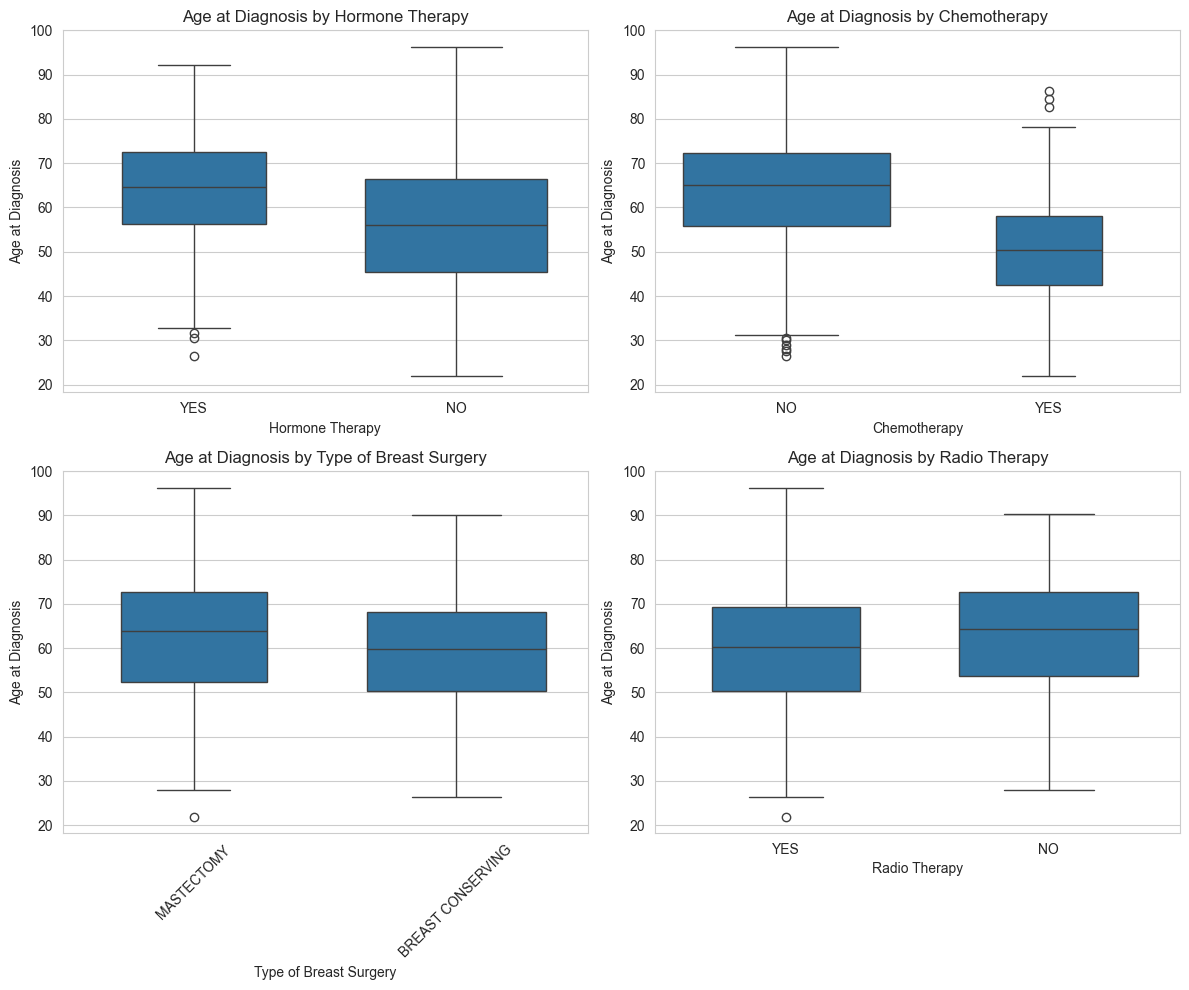

In [67]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sample_size_sqrt_ht = np.sqrt(data.groupby('Hormone Therapy').size()) / 50
sample_size_sqrt_ct = np.sqrt(data.groupby('Chemotherapy').size()) / 50
sample_size_sqrt_bs = np.sqrt(data.groupby('Type of Breast Surgery').size()) / 50
sample_size_sqrt_rt = np.sqrt(data.groupby('Radio Therapy').size()) / 50

# Boxplot for Hormone Therapy
sns.boxplot(x='Hormone Therapy', y='Age at Diagnosis', data=data, ax=axes[0, 0], width=sample_size_sqrt_ht)
axes[0, 0].set_title('Age at Diagnosis by Hormone Therapy')
# Boxplot for Chemotherapy
sns.boxplot(x='Chemotherapy', y='Age at Diagnosis', data=data, ax=axes[0, 1], width=sample_size_sqrt_ct)
axes[0, 1].set_title('Age at Diagnosis by Chemotherapy')
# Boxplot for Type of Breast Surgery
sns.boxplot(x='Type of Breast Surgery', y='Age at Diagnosis', data=data, ax=axes[1, 0], width=sample_size_sqrt_bs)
axes[1, 0].set_title('Age at Diagnosis by Type of Breast Surgery')
axes[1, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility
# Boxplot for Radio Therapy
sns.boxplot(x='Radio Therapy', y='Age at Diagnosis', data=data, ax=axes[1, 1], width=sample_size_sqrt_rt)
axes[1, 1].set_title('Age at Diagnosis by Radio Therapy')

plt.tight_layout()
plt.show()

## Chemotherapy

In [68]:
data_chemo = data.dropna(subset=['Chemotherapy', 'Tumor Size', 'Tumor Stage'])
chemo = data_chemo[data_chemo['Chemotherapy Binary'] == 1]
no_chemo = data_chemo[data_chemo['Chemotherapy Binary'] == 0]
print("Number of patients that got chemotherapy:", len(chemo))
print("Number of patients that did not get chemotherapy:", len(no_chemo))

Number of patients that got chemotherapy: 313
Number of patients that did not get chemotherapy: 1136


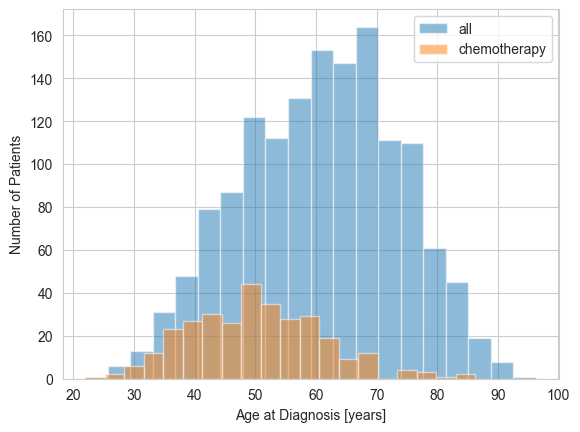

In [69]:
# Histogram of all compared to those that received chemotherapy
plt.hist(data_chemo['Age at Diagnosis'], bins=20, alpha=0.5, label='all')
plt.hist(chemo['Age at Diagnosis'], bins=20, alpha=0.5, label='chemotherapy')
plt.xlabel('Age at Diagnosis [years]')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

### Logistic Regression - with Age at Diagnosis

In [70]:
# Defining the dependent and independent variables
Xtrain = data_chemo[['Age at Diagnosis']]
ytrain = data_chemo[['Chemotherapy Binary']]

# Building the model and fitting the data
log_reg = sm.Logit(ytrain, Xtrain).fit()
print('\n Chemotherapy - Age at Diagnosis \n')
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.476881
         Iterations 5

 Chemotherapy - Age at Diagnosis 

                            Logit Regression Results                           
Dep. Variable:     Chemotherapy Binary   No. Observations:                 1449
Model:                           Logit   Df Residuals:                     1448
Method:                            MLE   Df Model:                            0
Date:                 Sat, 27 Jan 2024   Pseudo R-squ.:                 0.08611
Time:                         16:25:58   Log-Likelihood:                -691.00
converged:                        True   LL-Null:                       -756.11
Covariance Type:             nonrobust   LLR p-value:                       nan
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Age at Diagnosis    -0.0245      0.001    -21.604   

### Logistic Regression - including more variables

In [71]:
# Defining the dependent and independent variables
Xtrain = data_chemo[['Age at Diagnosis', 'Tumor Size', 'Tumor Stage']]
ytrain = data_chemo[['Chemotherapy Binary']]

#Building the model and fitting the data
log_reg = sm.Logit(ytrain, Xtrain).fit()
print('Chemotherapy - Age at Diagnosis, Tumor Size, Tumor Stage')
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.348180
         Iterations 7
Chemotherapy - Age at Diagnosis, Tumor Size, Tumor Stage
                            Logit Regression Results                           
Dep. Variable:     Chemotherapy Binary   No. Observations:                 1449
Model:                           Logit   Df Residuals:                     1446
Method:                            MLE   Df Model:                            2
Date:                 Sat, 27 Jan 2024   Pseudo R-squ.:                  0.3327
Time:                         16:25:58   Log-Likelihood:                -504.51
converged:                        True   LL-Null:                       -756.11
Covariance Type:             nonrobust   LLR p-value:                5.425e-110
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Age at Diagnosis    -0.0974    

## Type of Breast Surgery

In [72]:
data_surgery = data.dropna(subset=['Type of Breast Surgery', 'Tumor Size', 'Tumor Stage'])
surgery = data_surgery[data_surgery['Type of Breast Surgery Binary'] == 1]
no_surgery = data_surgery[data_surgery['Type of Breast Surgery Binary'] == 0]
print("Number of patients that got Mastectomy:", len(surgery))
print("Number of patients that got Breast Conserving Therapy:", len(no_surgery))

Number of patients that got Mastectomy: 824
Number of patients that got Breast Conserving Therapy: 612


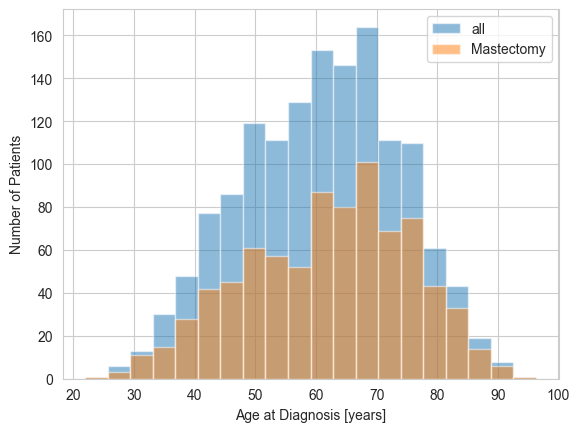

In [73]:
# Histogram of all compared to those that received chemotherapy
plt.hist(data_surgery['Age at Diagnosis'], bins=20, alpha=0.5, label='all')
plt.hist(surgery['Age at Diagnosis'], bins=20, alpha=0.5, label='Mastectomy')
plt.xlabel('Age at Diagnosis [years]')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

In [74]:
# Defining the dependent and independent variables
Xtrain = data_surgery[['Age at Diagnosis']]
ytrain = data_surgery[['Type of Breast Surgery Binary']]

# Building the model and fitting the data
log_reg = sm.Logit(ytrain, Xtrain).fit()
print('Surgery Therapy - Age at Diagnosis, Tumor Size, Tumor Stage')
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.679085
         Iterations 4
Surgery Therapy - Age at Diagnosis, Tumor Size, Tumor Stage
                                 Logit Regression Results                                
Dep. Variable:     Type of Breast Surgery Binary   No. Observations:                 1436
Model:                                     Logit   Df Residuals:                     1435
Method:                                      MLE   Df Model:                            0
Date:                           Sat, 27 Jan 2024   Pseudo R-squ.:                0.004580
Time:                                   16:25:58   Log-Likelihood:                -975.17
converged:                                  True   LL-Null:                       -979.65
Covariance Type:                       nonrobust   LLR p-value:                       nan
                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------

## Hormone Therapy

In [75]:
data_hormone = data.dropna(subset=['Hormone Therapy', 'Tumor Size', 'Tumor Stage', 'ER Status'])
hormone = data_hormone[data_hormone['Hormone Therapy Binary'] == 1]
no_hormone = data_hormone[data_hormone['Hormone Therapy Binary'] == 0]
print("Number of patients that got Hormone Therapy:", len(hormone))
print("Number of patients that did not get Hormone Therapy:", len(no_hormone))

Number of patients that got Hormone Therapy: 884
Number of patients that did not get Hormone Therapy: 565


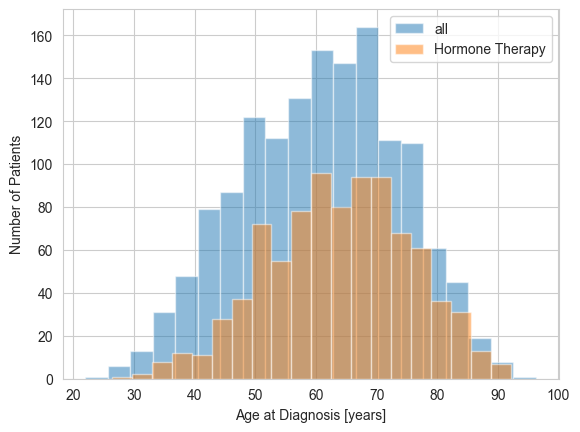

In [76]:
# Histogram of all compared to those that received chemotherapy
plt.hist(data_hormone['Age at Diagnosis'], bins=20, alpha=0.5, label='all')
plt.hist(hormone['Age at Diagnosis'], bins=20, alpha=0.5, label='Hormone Therapy')
plt.xlabel('Age at Diagnosis [years]')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

### Logistic Regression - with Age at Diagnosis

In [77]:
# Defining the dependent and independent variables
Xtrain = data_hormone[['Age at Diagnosis']]
ytrain = data_hormone[['Hormone Therapy Binary']]

# Building the model and fitting the data
log_reg = sm.Logit(ytrain, Xtrain).fit()
print('Hormone Therapy - Age at Diagnosis')
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.654440
         Iterations 4
Hormone Therapy - Age at Diagnosis
                             Logit Regression Results                             
Dep. Variable:     Hormone Therapy Binary   No. Observations:                 1449
Model:                              Logit   Df Residuals:                     1448
Method:                               MLE   Df Model:                            0
Date:                    Sat, 27 Jan 2024   Pseudo R-squ.:                 0.02135
Time:                            16:25:58   Log-Likelihood:                -948.28
converged:                           True   LL-Null:                       -968.97
Covariance Type:                nonrobust   LLR p-value:                       nan
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Age at Diagnosis     0.0092  

### Logistic Regression - including more variables

In [78]:
# Defining the dependent and independent variables
Xtrain = data_hormone[['Age at Diagnosis', 'Tumor Size', 'Tumor Stage', 'ER Status Binary']]
ytrain = data_hormone[['Hormone Therapy Binary']]

# Building the model and fitting the data
log_reg = sm.Logit(ytrain, Xtrain).fit()
print('Hormone Therapy - Age at Diagnosis, Tumor Size, Tumor Stage, ER Status')
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.611576
         Iterations 5
Hormone Therapy - Age at Diagnosis, Tumor Size, Tumor Stage, ER Status
                             Logit Regression Results                             
Dep. Variable:     Hormone Therapy Binary   No. Observations:                 1449
Model:                              Logit   Df Residuals:                     1445
Method:                               MLE   Df Model:                            3
Date:                    Sat, 27 Jan 2024   Pseudo R-squ.:                 0.08545
Time:                            16:25:58   Log-Likelihood:                -886.17
converged:                           True   LL-Null:                       -968.97
Covariance Type:                nonrobust   LLR p-value:                 1.141e-35
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

## Radio Therapy

In [79]:
data_radio = data.dropna(subset=['Radio Therapy', 'Tumor Size', 'Tumor Stage'])
radio = data_radio[data_radio['Radio Therapy Binary'] == 1]
no_radio = data_radio[data_radio['Radio Therapy Binary'] == 0]
print("Number of patients that got Radio Therapy:", len(radio))
print("Number of patients that did not get Radio Therapy:", len(no_radio))

Number of patients that got Radio Therapy: 951
Number of patients that did not get Radio Therapy: 498


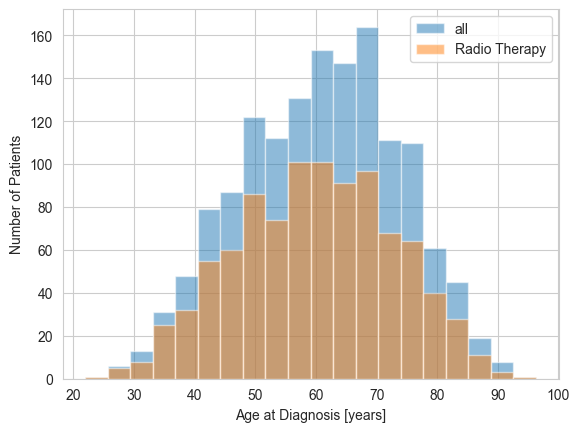

In [80]:
# Histogram of all compared to those that received chemotherapy
plt.hist(data_radio['Age at Diagnosis'], bins=20, alpha=0.5, label='all')
plt.hist(radio['Age at Diagnosis'], bins=20, alpha=0.5, label='Radio Therapy')
plt.xlabel('Age at Diagnosis [years]')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

### Logistic Regression - with Age at Diagnosis

In [81]:
# Defining the dependent and independent variables
Xtrain = data_radio[['Age at Diagnosis']]
ytrain = data_radio[['Radio Therapy Binary']]

# Building the model and fitting the data
log_reg = sm.Logit(ytrain, Xtrain).fit()
print('Radio Therapy - Age at Diagnosis')
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.651216
         Iterations 4
Radio Therapy - Age at Diagnosis
                            Logit Regression Results                            
Dep. Variable:     Radio Therapy Binary   No. Observations:                 1449
Model:                            Logit   Df Residuals:                     1448
Method:                             MLE   Df Model:                            0
Date:                  Sat, 27 Jan 2024   Pseudo R-squ.:                -0.01207
Time:                          16:25:58   Log-Likelihood:                -943.61
converged:                         True   LL-Null:                       -932.36
Covariance Type:              nonrobust   LLR p-value:                       nan
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Age at Diagnosis     0.0096      0.001     10.7

### Logistic Regression - including more variables

In [82]:
# Defining the dependent and independent variables
Xtrain = data_radio[['Age at Diagnosis', 'Tumor Size', 'Tumor Stage']]
ytrain = data_radio[['Radio Therapy Binary']]

# Building the model and fitting the data
log_reg = sm.Logit(ytrain, Xtrain).fit()
print('Radio Therapy - Age at Diagnosis, Tumor Size, Tumor Stage')
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.630319
         Iterations 5
Radio Therapy - Age at Diagnosis, Tumor Size, Tumor Stage
                            Logit Regression Results                            
Dep. Variable:     Radio Therapy Binary   No. Observations:                 1449
Model:                            Logit   Df Residuals:                     1446
Method:                             MLE   Df Model:                            2
Date:                  Sat, 27 Jan 2024   Pseudo R-squ.:                 0.02041
Time:                          16:25:58   Log-Likelihood:                -913.33
converged:                         True   LL-Null:                       -932.36
Covariance Type:              nonrobust   LLR p-value:                 5.456e-09
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Age at Diagnosis    -0